<h1>Nettoyage des commentaires</h1>

Avant de pouvoir faire de l'analyse de sentiment pour chaque commentaire, il faut d'abord les nettoyer pour les rendre lisibles pour l'ordinateur. Premièrement, nous allons transformer le fichier data_reviews en une base de données où chaque observation est un commentaire. Puis, nous allons nettoyer chaque commentaire en utilisant des fonctions permettant de supprimer la ponctuation, les stop-words et la lemmatisation.



In [98]:
#pip install spacy

In [3]:
# Importation de packages nécessaires

import pandas as pd
import json
import nltk
import spacy
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

<h2>Création de la base de données des commentaires</h2>

In [6]:
# Transformation du fichier json en un Dataframe Pandas

# Charger le fichier JSON
with open("data_reviews.json", 'r') as file:
    data = json.load(file)


In [7]:
movie_name = []
comments = []
notes = []

for movie, dico in data.items():
    if '0' in dico and isinstance(dico['0'], list):  # Vérifier si la clé '0' est une liste
        for comment in dico['0']:
            movie_name.append(movie)
            comments.append(comment)
            notes.append(dico['1'])

df = pd.DataFrame({
    'Film': movie_name,
    'Commentaire': comments,
    'Note imdb': notes
})

df.sample(5)

,Film,Commentaire,Note imdb
2686,Le Seigneur des anneaux : Le Retour du roi,"I will keep it short, because what needs to be...","9,0"
697,Spider-Man: No Way Home,After leaving the cinema it dawned on me what ...,"8,2"
3381,Jurassic Park,How can you begin to describe this movie? I ca...,"8,2"
1109,Top Gun : Maverick,This is one of the best theatrical experiences...,"8,3"
4181,Pirates des Caraïbes : La Fontaine de Jouvence,Depp's rummy rogue is clever and lovable as ev...,"6,6"


<h2>Nettoyage des commentaires</h2>

In [8]:
# Téléchargement d'éléments nécessaires à la tokenisation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...


True

In [10]:
# Tokenisation et suppression de la ponctuation

# On commence par charger le modèle de la langue anglaise de Spacy (les commentaires sont en anglais)
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# Fonction qui prend en argument un commentaire (chaîne de caractère) et qui retourne une liste des tokens sans les stopwords et la ponctuation
def tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
# On crée une nouvelle colonne dans la bdd avec la liste des tokens pour chaque commentaire
df['Tokens'] = df['Commentaire'].apply(tokenize)
df.sample(5)

,Film,Commentaire,Note imdb,Tokens
1692,Black Panther,Disappointing. Just another superhero film but...,"7,3","[Disappointing, superhero, film, strangely, re..."
4073,Aladdin,Such a bad movie I would have to say one of th...,"6,9","[bad, movie, worst, seen, acting, terrible, po..."
2349,Fast and Furious 8,Fate of the furious is action set piece after ...,"6,6","[Fate, furious, action, set, piece, action, se..."
3652,Joker,"Whether you end up loving or hating Joker, Tod...","8,4","[end, loving, hating, Joker, Todd, Phillip, gr..."
2896,Aquaman,Well it is time for her to get cancelled. I al...,"6,8","[time, cancelled, need, characters, turns, pos..."


Avec Spacy, l'algortihme s'exécute en près de 6 min pour l'ensemble de la base de données. Nous avons utilisé Spacy et non nltk pour la tokenization et la suppression des stopwords, puisque Spacy a un répertoire plus important de stopwords et a de meilleures performances pour les textes volumineux.

Nous allons désormais procéder à la lemmatisation des commentaires pour pouvoir allèger les algorithmes de NLP plus tard.

In [12]:
# Fonction qui prend en argument une liste de tokens et qui retourne ces tokens lemmatisés
def lemm(tokens):
    # D'abord, on transforme la liste en doc Spacy
    tokens_as_doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    # Lemmatisation du doc 
    lemmatized = [token.lemma_ for token in tokens_as_doc]
    return lemmatized
# Le lemma_ de Spacy ne reconnait pas les tokens et renvoie des listes vides (Pourquoi ?)

lemmatizer = WordNetLemmatizer()

def lemm2(tokens):
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized



In [13]:
# On crée une nouvelle colonne des tokens lemmatisés
df['Tokens lemmatisés'] = df['Tokens'].apply(lemm2)

df.sample(5)

,Film,Commentaire,Note imdb,Tokens,Tokens lemmatisés
3878,Toy Story 4,I read that this broke all records so went to ...,"7,7","[read, broke, records, went, expecting, great,...","[read, broke, record, went, expecting, great, ..."
726,Jurassic World,What a shame. This movie could have been so mu...,"6,9","[shame, movie, better, completely, enthralled,...","[shame, movie, better, completely, enthralled,..."
1255,La Reine des neiges 2,This fits in the ranks of bad Disney sequels a...,"6,8","[fits, ranks, bad, Disney, sequels, worse, Wre...","[fit, rank, bad, Disney, sequel, worse, Wreck,..."
1529,Super Mario Bros. le film,This movie was a lot of fun compare to the vid...,"7,1","[movie, lot, fun, compare, video, game, phenom...","[movie, lot, fun, compare, video, game, phenom..."
4372,Le Monde de Dory,I watched this in theaters and enjoyed it a lo...,"7,2","[watched, theaters, enjoyed, lot, clownfish, f...","[watched, theater, enjoyed, lot, clownfish, fa..."


<h2>Représentation des mots</h2>

Maintenant, visualisons pour certains commentaires les mots les plus représentés après nettoyage des commentaires.

Commençons d'abord par visualiser un premier nuage de mots d'un commentaire quelconque.

In [14]:
# Fonction qui prend en argument une liste de tokens et qui retourne le nuage de mots correspondant.

def cloud(tokens):
    text = " ".join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    return wordcloud


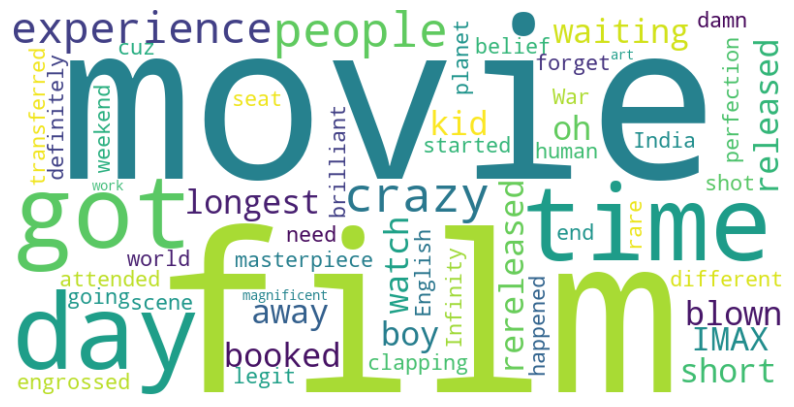

In [64]:
plt.figure(figsize=(10, 8))
plt.imshow(cloud(df['Tokens lemmatisés'][0]), interpolation='bilinear')
plt.axis("off")
plt.show()

Par exemple, pour le premier commentaire de la bdd, on peut dès à présent avoir une idée sur son avis vis à vis du film grâce à ce nuage de mots, de par la présence de mots tels que 'masterpiece, 'magnificent', 'perfection'... qui sont assez représentés. Néanmoins, comme nous avons utilisé nltk, le lemmatiseur ne reconnait pas les entités nommés telles que 'IMAX', 'India'... .

## Partie ajoutée par Vincent (à revoir)

In [22]:
#!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.6 MB/s eta 0:00:0000:0100:01


In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

In [ ]:
#Convertit les commentaires en string.
def your_string_function(column):
    # Your string processing logic here
    # For example, converting all strings to lowercase
    return column.str.lower()
df['Commentaire'] =  your_string_function(df["Commentaire"])

Nous allons comparer les différents algorithmes proposés, notamment ceux des modules TextBlob, nltk et scapy.

On va dans un premier temps utiliser le module TextBlob

In [65]:
def analyze_sentiment_blob(tokens):
    text = ' '.join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [78]:
# Appliquez la fonction à la colonne 'tokens_lemmatized' du DataFrame
df['sentiment_polarity_blob'] = df['Tokens lemmatisés'].apply(analyze_sentiment_blob)

On essaye maintenant avec la fonction SentimentIntensityAnalyzer de nltk

In [99]:
def analyze_sentiment_nltk(tokens):
    text = ' '.join(tokens)
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [69]:
df['sentiment_polarity_nltk'] = df["Tokens lemmatisés"].apply(analyze_sentiment_nltk)

On essaye enfin de faire de l'analyse de sentiment avec le module scapy.

La fonction ci-dessus ne fonctionne pas bien puisqu'elle retourne que des 0. Je la laisse au cas où trouve le problème.

Les notes sont sous forme de string. Nous changeons cela pour pourvoir faire des statistiques avec.

In [73]:
#change le type de la colonne 'Note imdb' en float
df['Note imdb'] = df['Note imdb'].replace(',', '.').astype(float)

On groupe les observations selon le film. Cela nous permettra de faire un join avec le premier dataframe (celui de wikipedia)

In [134]:
grouped = df.groupby('Film')
mean_by_group = grouped[["sentiment_polarity_nltk", "sentiment_polarity_blob",  'Note imdb']].mean()
mean_by_group

,sentiment_polarity_nltk,sentiment_polarity_blob,Note imdb
Film,,,
Aladdin,0.594147,0.153070,6.9
Alice au pays des merveilles,0.755444,0.135937,6.4
Aquaman,0.207577,-0.021710,6.8
Avatar,0.857858,0.205706,7.9
Avatar : La Voie de l'eau,0.701461,0.121443,7.6
Avengers,0.763783,0.214765,8.0
Avengers : L'Ère d'Ultron,0.790375,0.150330,7.3
Avengers: Endgame,0.502004,0.181866,8.4
Avengers: Infinity War,0.542414,0.189231,8.4


On peut observe que les colonnes pol_conti et pol sont très proche. A voir laquelle nous garderons.

In [130]:
correlation = mean_by_group['sentiment_polarity_nltk'].corr(mean_by_group['Note imdb'])
print(f"La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk est de {correlation}")

La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film est de 0.2978600852174349


In [131]:
correlation = mean_by_group['sentiment_polarity_blob'].corr(mean_by_group['Note imdb'])
print(f"La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de {correlation}")

La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de 0.519272018770084


In [132]:
correlation = mean_by_group['sentiment_polarity_nltk'].corr(mean_by_group['sentiment_polarity_blob'])
print(f"La correlation entre la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de {correlation}")

La correlation entre la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de 0.7549503705343742


Il y a une relation positive non négligeable entre les notes et le score des commentaires. Il y a également une forte corrélation entre les scores évalués par textblob et ceux évalués par nltk.

# Un peu de Visualisation

In [148]:
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep", color_codes=True)

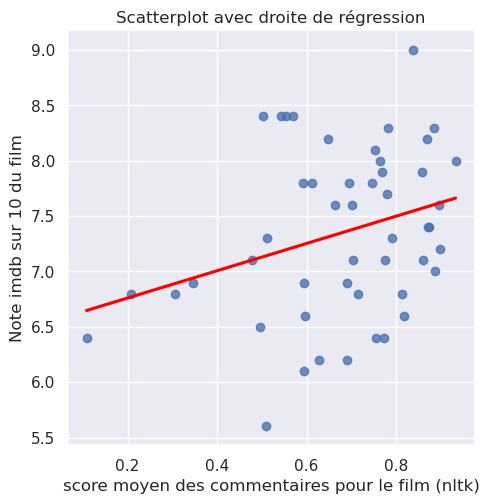

In [149]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_nltk', y='Note imdb', data=mean_by_group, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('Scatterplot avec droite de régression')
plt.xlabel('score moyen des commentaires pour le film (nltk)')
plt.ylabel('Note imdb sur 10 du film')

# Affichage du graphique
plt.show()

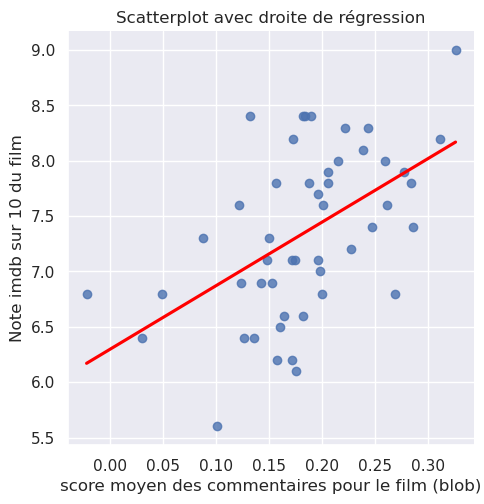

In [150]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_blob', y='Note imdb', data=mean_by_group, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('Scatterplot avec droite de régression')
plt.xlabel('score moyen des commentaires pour le film (blob)')
plt.ylabel('Note imdb sur 10 du film')

# Affichage du graphique
plt.show()

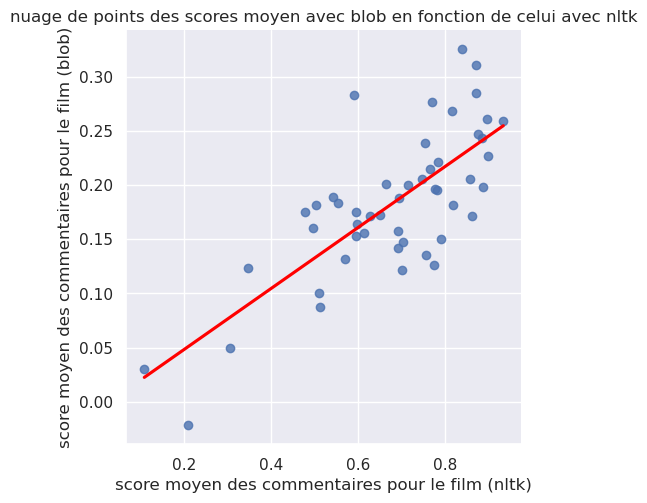

In [151]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_nltk', y='sentiment_polarity_blob', data=mean_by_group, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('nuage de points des scores moyen avec blob en fonction de celui avec nltk')
plt.xlabel('score moyen des commentaires pour le film (nltk)')
plt.ylabel('score moyen des commentaires pour le film (blob)')

# Affichage du graphique
plt.show()